<a href="https://colab.research.google.com/github/jasnaibrahim/kepler-data/blob/main/keplerdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **ML Alogrithm to classify the planets as Candidate/False positive/Confirmed etc based on the  column “koi_disposition”.**


importing neccessory libraries


In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


Data loading

In [2]:

df=pd.read_excel("/content/Kepler(1).xlsx")

EDA-Exploaratory Data Analysis

In [3]:
df.head(10)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,10872983,K00756.03,Kepler-228 b,CONFIRMED,CANDIDATE,0.992,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
8,6721123,K00114.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-124.0,3.986,0.182,-0.098,1.958,0.322,-0.483,298.86435,42.151569,12.660
9,10910878,K00757.01,Kepler-229 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-83.0,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2360 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [5]:
df = df.drop(['koi_teq_err1', 'koi_teq_err2'], axis=1) #we are dropping since it contain full null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2360 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
profile=ProfileReport(df,title="kepler data analysis")
profile.to_notebook_iframe()

In [7]:

df.drop(['kepler_name', 'koi_pdisposition', 'koi_srad_err2', 'koi_srad_err1',
         'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_steff_err2', 'koi_steff_err1',
         'koi_depth_err1', 'koi_depth_err2', 'koi_insol_err2'],
        axis=1, inplace=True) #checked correlatio and EDA dropped unnecessory columns


In [8]:
df.columns

Index(['kepid', 'kepoi_name', 'koi_disposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
       'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_prad',
       'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_slogg', 'koi_slogg_err1',
       'koi_slogg_err2', 'koi_srad', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [9]:
df.drop(['koi_slogg_err2', 'koi_period_err1', 'koi_period_err2', 'koi_impact_err2'],
        axis=1, inplace=True)

In [10]:
df.drop(['koi_duration_err1', 'koi_duration_err2','koi_slogg_err1', 'koi_insol_err1','koi_prad_err1' ],
        axis=1, inplace=True)

In [11]:
df.columns

Index(['kepid', 'kepoi_name', 'koi_disposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
       'koi_time0bk', 'koi_impact', 'koi_impact_err1', 'koi_duration',
       'koi_depth', 'koi_prad', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff',
       'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [12]:
df.drop([ 'koi_impact_err1', 'koi_prad_err2' ],   axis=1, inplace=True)

In [13]:
df.isnull().sum() #now dropped every unwanted data and now checking null values

,0
kepid,0
kepoi_name,0
koi_disposition,0
koi_score,1510
koi_fpflag_nt,0
koi_fpflag_ss,0
koi_fpflag_co,0
koi_fpflag_ec,0
koi_period,0
koi_time0bk,0


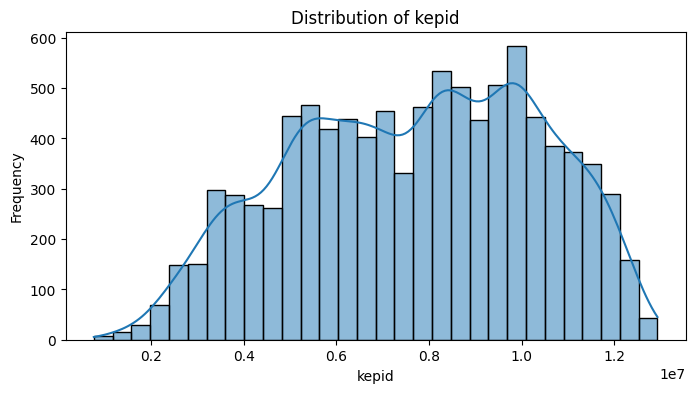

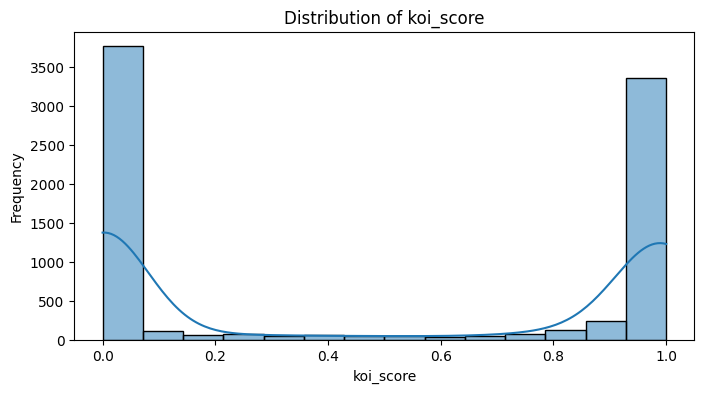

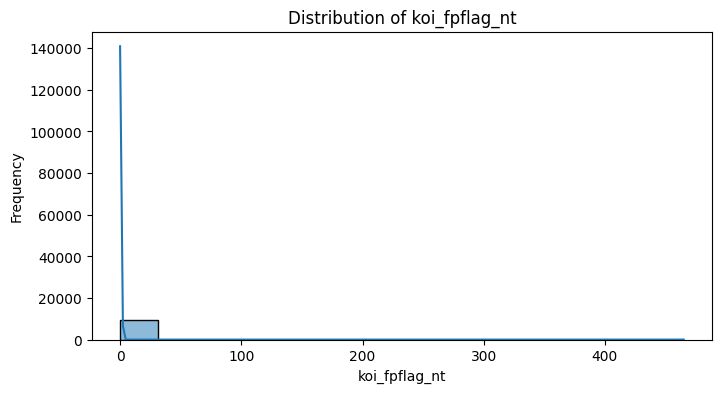

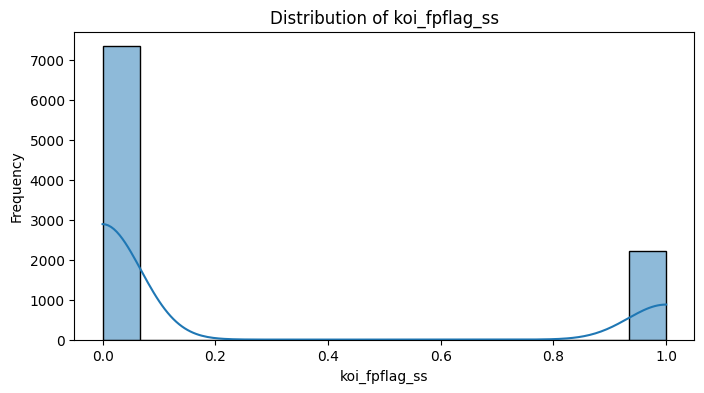

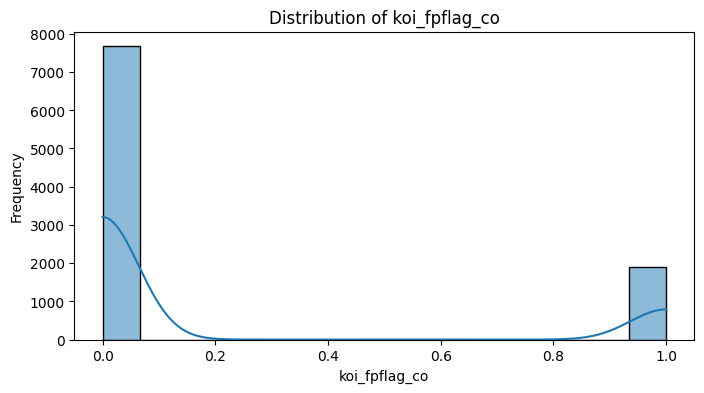

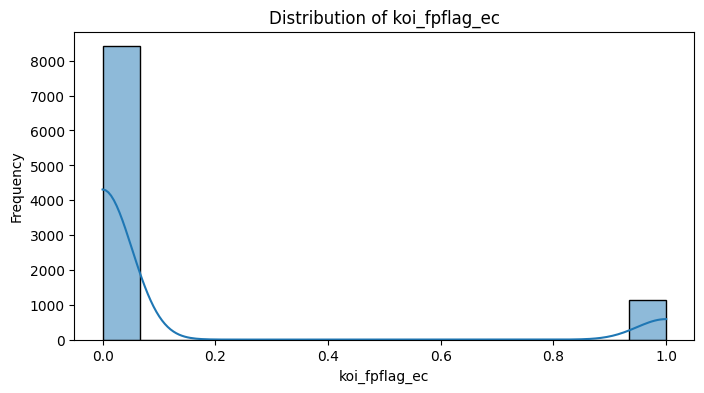

KeyboardInterrupt: 

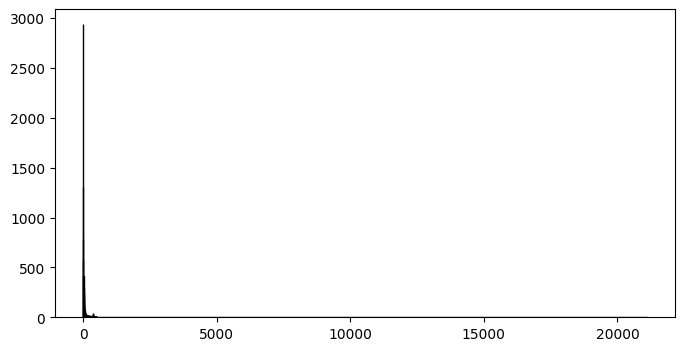

In [14]:

# Plot distribution for each numerical column
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [15]:
df['koi_disposition'].value_counts()

,count
koi_disposition,
FALSE POSITIVE,4840
CANDIDATE,2366
CONFIRMED,2358


In [16]:
df['koi_tce_delivname'].value_counts()

,count
koi_tce_delivname,
q1_q17_dr25_tce,8054
q1_q16_tce,796
q1_q17_dr24_tce,368


In [17]:
df.drop(['koi_tce_delivname','kepoi_name'],axis=1,inplace=True)

In [18]:
df.columns

Index(['kepid', 'koi_disposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
       'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad',
       'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [ ]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'O']
categorical_columns

In [19]:



# Define target column and numerical features
target_column = 'koi_disposition'
numerical_columns = [feature for feature in df.columns if df[feature].dtype != 'O' and feature != target_column]

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Encode the target column
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Numerical pipeline with imputer and scaler
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(transformers=[
    ("num_pipeline", num_pipeline, numerical_columns)
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Apply preprocessing to training and test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Apply SMOTE to balance classes in the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_transformed, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", pd.Series(y_train_smote).value_counts())

# Model definitions and hyperparameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

params = {
    "Logistic Regression": {'C': [0.1, 1, 10, 100], 'solver': ['liblinear']},
    "Decision Tree": {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15, 20], 'splitter': ['best', 'random']},
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    "XGBoost": {'learning_rate': [0.1, 0.01], 'n_estimators': [50, 100], 'max_depth': [3, 6, 10]},
    "Naive Bayes": {},
    "KNN": {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
}

# Model evaluation function
def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = {}
    best_params = {}

    for name, model in models.items():
        print(f"Training and tuning model: {name}...")

        # GridSearchCV to tune hyperparameters
        gs = GridSearchCV(model, params.get(name, {}), cv=3, n_jobs=-1, verbose=1)
        gs.fit(X_train, y_train)

        # Store best model and parameters
        best_model = gs.best_estimator_
        best_params[name] = gs.best_params_
        print(f"Best parameters for {name}: {gs.best_params_}")

        # Make predictions and evaluate
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report[name] = accuracy

        print(f"Accuracy for {name}: {accuracy:.4f}")

    return report, best_params

# Evaluate models (using SMOTE data for training)
model_report, best_params = evaluate_models(X_train_smote, y_train_smote, X_test_transformed, y_test, models, params)

# Identify best model
best_model_name = max(model_report, key=model_report.get)
print(f"Best model: {best_model_name} with accuracy: {model_report[best_model_name]:.4f}")
print("All model performances:", model_report)

# Show best parameters for the best model
print(f"Best parameters for {best_model_name}: {best_params[best_model_name]}")

# Train and evaluate the best model (using SMOTE data)
best_model = models[best_model_name]
best_model.set_params(**best_params[best_model_name])  # Set the best parameters
best_model.fit(X_train_smote, y_train_smote)

# Make predictions on test data
y_pred = best_model.predict(X_test_transformed)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Class distribution after SMOTE: 2    3901
1    3901
0    3901
Name: count, dtype: int64
Training and tuning model: Logistic Regression...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters for Logistic Regression: {'C': 100, 'solver': 'liblinear'}
Accuracy for Logistic Regression: 0.8536
Training and tuning model: Decision Tree...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 15, 'splitter': 'best'}
Accuracy for Decision Tree: 0.8730
Training and tuning model: Random Forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for Random Forest: {'max_depth': 30, 'n_estimators': 200}
Accuracy for Random Forest: 0.8970
Training and tuning model: XGBoost...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Accuracy for XGBoost: 0.8939
Training and tuni

conclusion

    Best Model:

    The Random Forest model achieved the highest accuracy of 0.8970, making it the best-performing model among the ones evaluated,  XGBoost: Accuracy of 0.8939. A strong competitor to Random Forest, but slightly lower in accuracy.
    The best hyperparameters for the Random Forest model were:
        max_depth: 30
        n_estimators: 200

   random forest showed excellent performance in classifying the target variable, achieving an accuracy of about 90%.